
# Sphere Point Cloud Generation and Visualization

The following code generates a sphere point cloud, saves it as a binary PLY file, and visualizes it using a 3D scatter plot.


In [190]:
import numpy as np
import struct

In [191]:
# Test numpy function meshgrid
theta = np.array([0, 1, 2])
phi = np.array([7, 8])
theta_grid, phi_grid = np.meshgrid(theta, phi)

print(theta_grid)
# Output:
# [[0 1 2]
#  [0 1 2]]

print(phi_grid)
# Output:
# [[7 7 7]
#  [8 8 8]]


[[0 1 2]
 [0 1 2]]
[[7 7 7]
 [8 8 8]]


In [192]:
# Test numpy function ravel
array = np.array([[1, 2, 3], [4, 5, 6]])
flat_array = np.ravel(array)

print(flat_array)
# Output:
# [1 2 3 4 5 6]


[1 2 3 4 5 6]


In [193]:
# Test numpy function vstack
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.array([7, 8, 9])
stacked = np.vstack((x, y, z))

print(stacked)
# Output:
# [[1 2 3]
#  [4 5 6]
#  [7 8 9]]


[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [194]:
# Test struct function pack
packed_data = struct.pack('i', 42)  # 'i' stands for Integer (4 bytes)

print(packed_data)
# Output: b'*\x00\x00\x00'


b'*\x00\x00\x00'


In [195]:
data = b'*\x00\x00\x00'
unpacked_data = struct.unpack('<i', data)  # Little Endian Integer

print(unpacked_data)
# Output: (42,)


(42,)


In [196]:
def generate_ply_sphere(filename, radius=1, num_theta=50, num_phi=25):
    # Generate the sphere point cloud with evenly spaced Theta and Phi values
    theta = np.linspace(0, 2 * np.pi, num_theta)
    phi = np.linspace(0, np.pi, num_phi)

    # Create a meshgrid of Theta and Phi (2D arrays)
    theta, phi = np.meshgrid(theta, phi)

    # Calculate the x, y, z coordinates of the sphere using vectorized computation
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)

    # Flatten the arrays for export
    points = np.vstack((x.ravel(), y.ravel(), z.ravel())).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""
    
    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [197]:
# Save the sphere as PLY file
generate_ply_sphere("sphere.ply")


In [198]:
import matplotlib.pyplot as plt


In [199]:
def plot_ply(filename):
    points = []

    # Read PLY file (binary)
    with open(filename, 'rb') as f:
        # Skip header
        while b'end_header' not in f.readline():
            pass

        # Read 3D points
        while True:
            bytes = f.read(12)  # 3 * 4 Bytes (float)
            if len(bytes) == 12:
                points.append(struct.unpack('fff', bytes))
            else:
                break

    points = np.array(points)
    
    # Create 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='b')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()


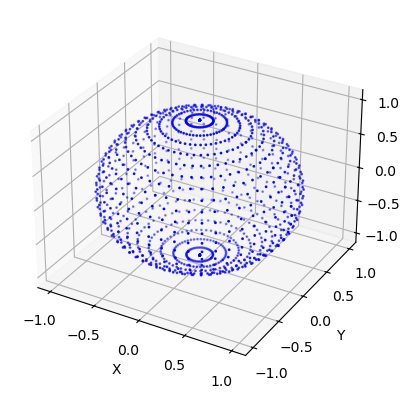

In [200]:
# Plot the sphere point cloud
plot_ply("sphere.ply")


In [201]:
import numpy as np
import struct

def generate_ply_circle(filename, radius=1, num_points=50, z=2.5):
    # Generate evenly spaced angles for the full circle
    angles = np.linspace(0, 2 * np.pi, num_points)  # 0 to 360 degrees

    # Calculate x and y coordinates of the circle using the angles
    x = radius * np.cos(angles) + radius  # Shift x by radius to ensure x > 0
    y = radius * np.sin(angles) + radius  # Shift y by radius to ensure y > 0

    # Initialize z-coordinates with the given z value
    z_coords = np.full(num_points, z)

    # Combine x, y, z into a single array of points
    points = np.vstack((x, y, z_coords)).T

    num_points = points.shape[0]

    # Write the binary PLY header
    header = f"""ply
format binary_little_endian 1.0
element vertex {num_points}
property float x
property float y
property float z
end_header
"""

    # Write the points to a binary PLY file
    with open(filename, 'wb') as f:
        f.write(header.encode('utf-8'))
        for point in points:
            f.write(struct.pack('fff', *point))


In [202]:
generate_ply_circle("circle.ply")


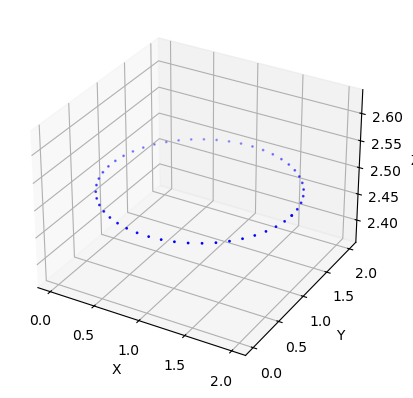

In [203]:
plot_ply("circle.ply")

# Transformation of 3D Point Cloud into 2D Amplitude Fields

The following code transforms the PLY file data into a 2D field (x and y coordinates) with a ground plane distance (z coordinate). It normalizes and scales the received data and writes it into an array. The amplitude fields are then visualized.

In [204]:
points = []

# Read PLY file (binary)
with open("circle.ply", 'rb') as f:
    # Skip header
    while b'end_header' not in f.readline():
        pass

    # Read 3D points
    while True:
        bytes = f.read(12)  # 3 * 4 Bytes (float)
        if len(bytes) == 12:
            points.append(struct.unpack('fff', bytes))
        else:
            break
            
points = np.array(points)


In [205]:
print(points)

[[2.00000000e+00 1.00000000e+00 2.50000000e+00]
 [1.99179006e+00 1.12787712e+00 2.50000000e+00]
 [1.96729481e+00 1.25365460e+00 2.50000000e+00]
 [1.92691672e+00 1.37526703e+00 2.50000000e+00]
 [1.87131870e+00 1.49071753e+00 2.50000000e+00]
 [1.80141366e+00 1.59811056e+00 2.50000000e+00]
 [1.71834934e+00 1.69568253e+00 2.50000000e+00]
 [1.62348986e+00 1.78183150e+00 2.50000000e+00]
 [1.51839256e+00 1.85514271e+00 2.50000000e+00]
 [1.40478337e+00 1.91441262e+00 2.50000000e+00]
 [1.28452754e+00 1.95866787e+00 2.50000000e+00]
 [1.15959990e+00 1.98718178e+00 2.50000000e+00]
 [1.03205156e+00 1.99948621e+00 2.50000000e+00]
 [9.03976977e-01 1.99537909e+00 2.50000000e+00]
 [7.77479053e-01 1.97492790e+00 2.50000000e+00]
 [6.54634953e-01 1.93846846e+00 2.50000000e+00]
 [5.37461698e-01 1.88659930e+00 2.50000000e+00]
 [4.27883327e-01 1.82017231e+00 2.50000000e+00]
 [3.27699095e-01 1.74027801e+00 2.50000000e+00]
 [2.38554046e-01 1.64822841e+00 2.50000000e+00]
 [1.61911890e-01 1.54553485e+00 2.500000

In [206]:
grid_size = 32  # max grid size (this size needs to be double the actual grid size of the board, e.g. for a 16x16 board, use 32)
max_dist = 0.25  # max distance from ground plane (in meters)

# Get the minimum and maximum values of the x, y and z coordinates
min_vals = np.min(points, axis=0)
max_vals = np.max(points, axis=0)

# Normalize the x and y coordinates to [0, grid_size-1] and convert to integers
coordinates = (points[:, :2] - min_vals[:2]) / (max_vals[:2] - min_vals[:2])  # Normalize to [0, 1]
coordinates = (coordinates * (grid_size - 1)).astype(int)  # Scale to [0, grid_size-1]

# Normalize the z coordinates to [0, max_dist]
distances = points[:, 2] / np.max(points[:, 2]) * max_dist

# Combine the integer x and y with the z values
normalized_coords_distances = np.hstack((coordinates, distances.reshape(-1, 1)))


In [207]:
print(normalized_coords_distances)


[[31.   15.    0.25]
 [30.   17.    0.25]
 [30.   19.    0.25]
 [29.   21.    0.25]
 [29.   23.    0.25]
 [27.   24.    0.25]
 [26.   26.    0.25]
 [25.   27.    0.25]
 [23.   28.    0.25]
 [21.   29.    0.25]
 [19.   30.    0.25]
 [17.   30.    0.25]
 [15.   31.    0.25]
 [13.   30.    0.25]
 [12.   30.    0.25]
 [10.   30.    0.25]
 [ 8.   29.    0.25]
 [ 6.   28.    0.25]
 [ 5.   26.    0.25]
 [ 3.   25.    0.25]
 [ 2.   23.    0.25]
 [ 1.   22.    0.25]
 [ 0.   20.    0.25]
 [ 0.   18.    0.25]
 [ 0.   16.    0.25]
 [ 0.   14.    0.25]
 [ 0.   12.    0.25]
 [ 0.   10.    0.25]
 [ 1.    8.    0.25]
 [ 2.    7.    0.25]
 [ 3.    5.    0.25]
 [ 5.    4.    0.25]
 [ 6.    2.    0.25]
 [ 8.    1.    0.25]
 [10.    0.    0.25]
 [12.    0.    0.25]
 [13.    0.    0.25]
 [15.    0.    0.25]
 [17.    0.    0.25]
 [19.    0.    0.25]
 [21.    1.    0.25]
 [23.    2.    0.25]
 [25.    3.    0.25]
 [26.    4.    0.25]
 [27.    6.    0.25]
 [29.    7.    0.25]
 [29.    9.    0.25]
 [30.   11.  

In [208]:
# Number of matrices to create
num_fields = coordinates.shape[0]

# Initialize a 3D array to hold all the fields (num_fields, grid_size, grid_size)
fields = np.zeros((num_fields, grid_size, grid_size))

# For each coordinate pair, set the corresponding position to 1 in each slice
for i, (x, y) in enumerate(coordinates):
    fields[i, x, y] = 1


In [209]:
fields.shape

(50, 32, 32)

In [210]:
print(fields[0])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [211]:
distances.shape


(50,)

In [212]:
def plot_fields(fields):
    num_fields = fields.shape[0]  # Number of fields to plot
    
    # Loop over each matrix and create a plot
    for i in range(num_fields):
        plt.figure()
        plt.imshow(fields[i], cmap='gray', interpolation='nearest')
        plt.title(f'Field {i+1}')
        plt.colorbar(label='Value')
        plt.show()
        

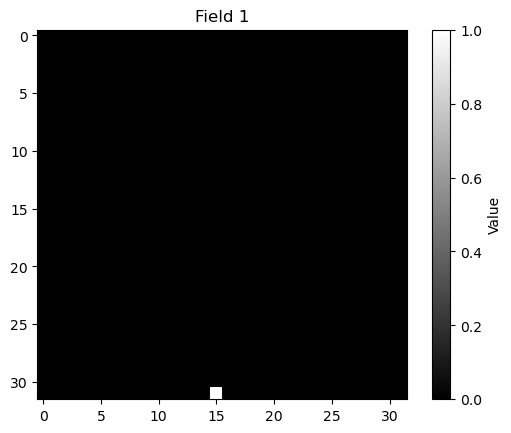

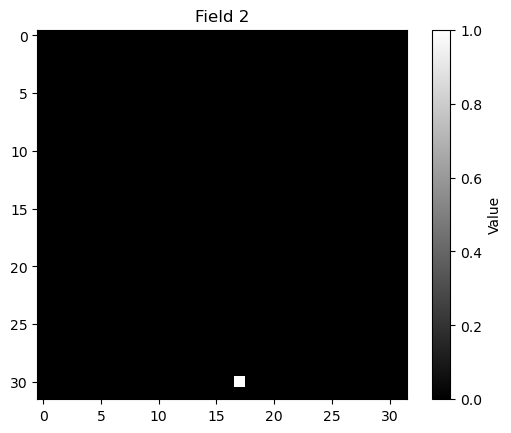

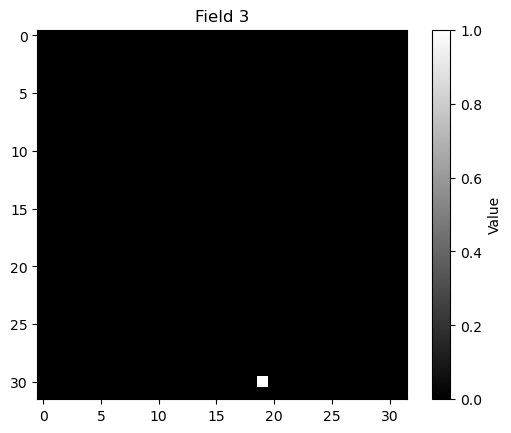

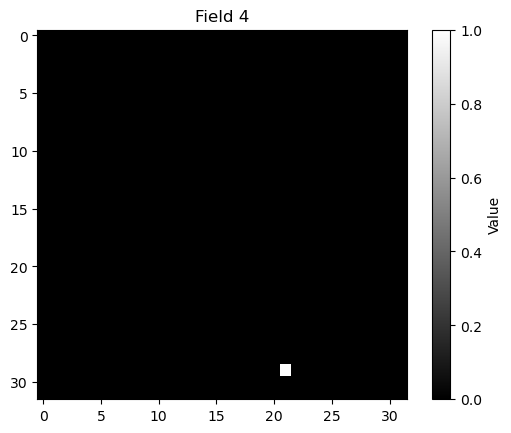

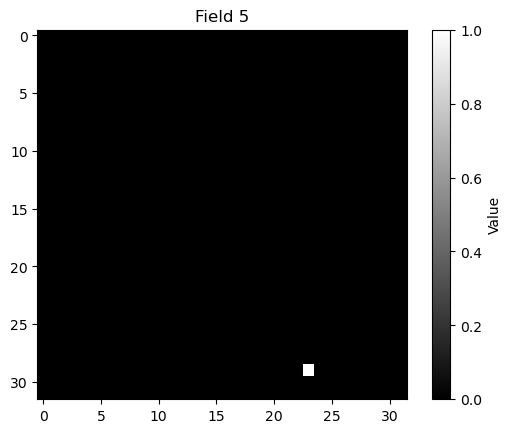

In [213]:
plot_fields(fields[:5])


# MATLAB Script Execution for Target Amplitude Calculation

The following code runs a MATLAB script to compute emission amplitudes and phases for the given amplitude fields and distances. The call to the MATLAB script is done by a subprocess call.

In [214]:
import scipy.io
import subprocess
import os


In [215]:
# Save the fields array to a .mat file
scipy.io.savemat('fields.mat', {'fields': fields})

# Save the distances array to a .mat file
scipy.io.savemat('distances.mat', {'distances': distances})

In [216]:
matlab_path = 'C:/Program Files/MATLAB/R2024b/bin/matlab.exe'

iterations = 50
board_size = 0.16
emitter_size = 0.01
amp_res = 0
phase_res = 32
emitter_freq = 40000
speed_of_sound = 343


In [217]:
# Create MATLAB script
matlab_script = f"""
% Load the data
load('fields.mat');
load('distances.mat');

% Get the number of fields (assumed to be the same as the number of distances)
num_fields = size(fields, 1);
grid_size = size(fields, 2);

% Pre-allocate arrays based on the expected dimensions
amps = zeros(num_fields, {int(board_size / emitter_size)**2});
phases = zeros(num_fields, {int(board_size / emitter_size)**2});
amp_slices = zeros(num_fields, grid_size, grid_size);

% Loop over the number of field entries
for i = 1:num_fields
    % Reshape fields from 1 x grid_size x grid_size to grid_size x grid_size
    field = squeeze(fields(i, :, :));
    
    % Call the function for each field and distance pair
    [temp_amps, temp_phases, temp_amp_slice] = calcEmissionForTargetAmpSlice(field, distances(i), {iterations}, {board_size}, {emitter_freq}, {speed_of_sound}, {emitter_size}, {amp_res}, {phase_res});
    
    % Store the results in the pre-allocated arrays
    amps(i, :) = temp_amps;
    phases(i, :) = temp_phases;
    amp_slices(i, :, :) = temp_amp_slice;
end

% Save the concatenated results
save('results.mat', 'amps', 'phases', 'amp_slices');

"""


In [218]:
# Save temporary MATLAB script
temp_script_path = os.path.join(os.getcwd(), 'temp_script.m').replace('\\', '/')
with open(temp_script_path, 'w') as f:
    f.write(matlab_script)
    

In [219]:
subprocess.run([matlab_path, '-batch', f"run('{temp_script_path}')"])


CompletedProcess(args=['C:/Program Files/MATLAB/R2024b/bin/matlab.exe', '-batch', "run('c:/Users/leona/OneDrive - student.kit.edu/Dokumente/Git/UltrasonicHapticsBoard/temp_script.m')"], returncode=0)

In [220]:
# Load results from the .mat file
results = scipy.io.loadmat('results.mat')


In [221]:
results


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Oct  7 13:52:33 2024',
 '__version__': '1.0',
 '__globals__': [],
 'amp_slices': array([[[0.18835332, 0.08066526, 0.11041277, ..., 0.15548821,
          0.23136422, 0.26132835],
         [0.15039745, 0.07593222, 0.07073438, ..., 0.12881857,
          0.16458608, 0.19120036],
         [0.09594131, 0.07114337, 0.06483013, ..., 0.07936218,
          0.08269176, 0.11436286],
         ...,
         [0.22513432, 0.13111084, 0.11034814, ..., 0.23348355,
          0.28450622, 0.29339086],
         [0.25356635, 0.11736504, 0.09911616, ..., 0.2372861 ,
          0.32425083, 0.3452314 ],
         [0.22631911, 0.09346819, 0.12200155, ..., 0.19124657,
          0.28881361, 0.31879092]],
 
        [[0.20580173, 0.20147833, 0.13373485, ..., 0.1382851 ,
          0.13962443, 0.16521285],
         [0.15611919, 0.16502006, 0.09586236, ..., 0.10224117,
          0.07993635, 0.09760505],
         [0.16352454, 0.18257708, 0.08626517, 

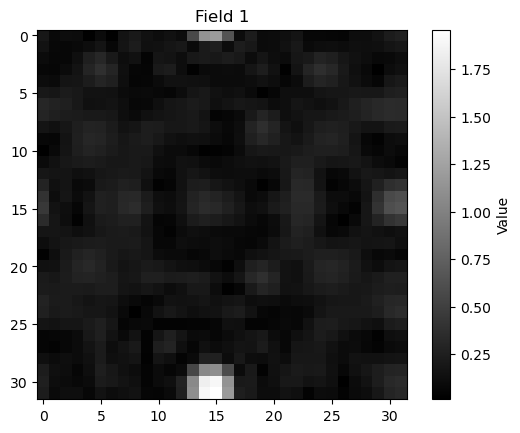

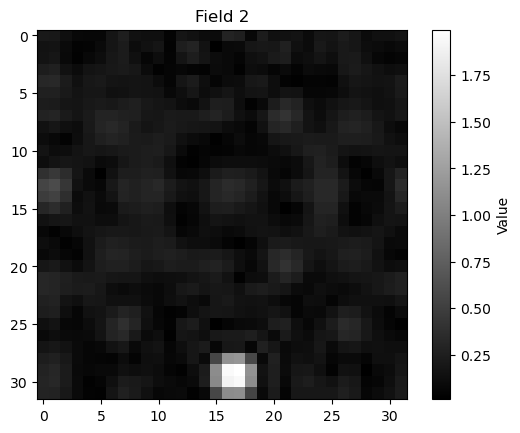

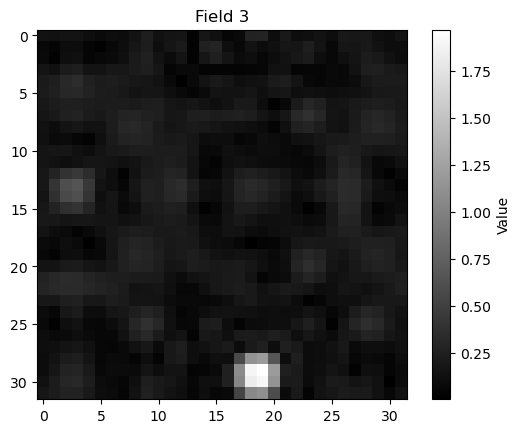

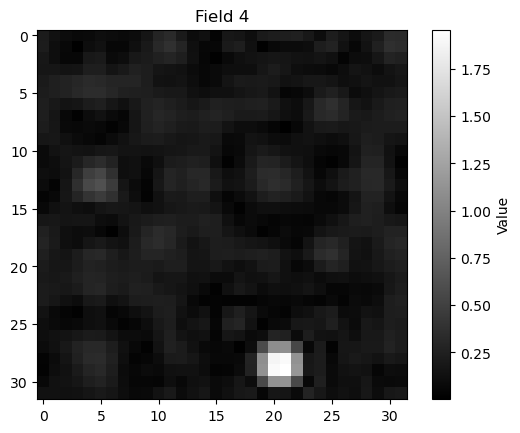

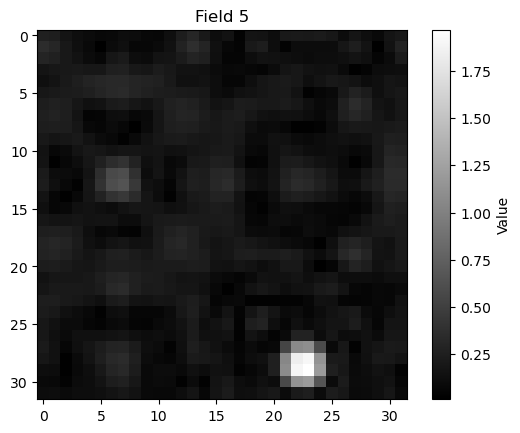

In [222]:
amp_slices = results['amp_slices']

plot_fields(amp_slices[:5])

In [223]:
# Clean up temporary files
os.remove('fields.mat')
os.remove('distances.mat')
os.remove('results.mat')
os.remove(temp_script_path)

# Convertion of Phases to UART data packages

The following code uses the pyserial library to open a COM port for UART communication. A PhaseTransmitter class is implemented to work with the ultrasonic board protocol.


In [224]:
import serial


In [225]:
# Open the serial connection
ser = serial.Serial(
    port='COM1',       # COM port (e.g., 'COM3' on Windows, '/dev/ttyUSB0' on Linux)
    baudrate=9600,     # Set the baud rate
    timeout=1          # Read timeout in seconds (optional)
)

# Check if the port is open
if ser.is_open:
    print(f"Connection to {ser.port} established.")
else:
    print(f"Connection to {ser.port} failed.")

# Send data to the serial port
ser.write(b'Hello, UART!\n')  # Send a byte sequence

# Read response from the serial device
response = ser.readline()  # Reads up to a newline or timeout
print("Received:", response.decode('utf-8'))

# Close the serial connection
ser.close()

Connection to COM1 established.
Received: 


In [226]:
class PhaseTransmitter:
    
    # Command dictionary to represent the protocol
    commands = {
        'set_phases_amplitudes': 0x80,  # Values below 0x80 are used to set phases or amplitudes
        'start_receiving_phases': 0xFE,
        'swap_buffer': 0xFD
    }

    def __init__(self, port, baudrate=9600, stopbits=serial.STOPBITS_ONE, timeout=1):
        """
        Initialize the serial connection.
        
        Parameters:
        - port: The COM port (e.g., 'COM3', '/dev/ttyUSB0')
        - baudrate: Baud rate for the communication (default 9600)
        - stopbits: Number of stop bits (default 1 stop bit)
        - timeout: Timeout for reading in seconds (default 1 second)
        """
        
        self.ser = serial.Serial(
            port=port,
            baudrate=baudrate,
            stopbits=stopbits,
            timeout=timeout
        )
        if self.ser.is_open:
            print(f"Connection to {self.ser.port} established.")
        else:
            print(f"Connection to {self.ser.port} failed.")

    def send_command(self, command):
        """Send a command to the device based on the command protocol."""

        if isinstance(command, (str, int, np.integer)):
            if isinstance(command, str) and command in self.commands:
                command_byte = self.commands[command]
                self.ser.write(command_byte)
                print(f"Sent command: {command}, byte: 0x{command_byte:02X}")
            elif isinstance(command, (int, np.integer)) and command < self.commands['set_phases_amplitudes']:
                self.ser.write(command)
                print(f"Sent command: set_phases_amplitudes, byte: 0x{command:02X}")
            else:
                if isinstance(command, str):
                    print(f"Invalid command: {command}")
                elif isinstance(command, (int, np.integer)):
                    print(f"Invalid command: 0x{command:02X}")
        else:
            print("Command must be a string or integer.")


    def send_phases(self, phases):
        """Send an array of phases to the device, encoded as per the protocol."""
        
        # Send command to start receiving phases
        self.send_command('start_receiving_phases')
        
        for phase in phases:
            # Send each phase as an integer
            self.send_command(phase)
                
        # Once all phases are sent, we can send a command to swap buffers
        self.send_command('swap_buffer')

    def close(self):
        """Close the serial connection."""
        
        self.ser.close()


In [227]:
transmitter = PhaseTransmitter(port='COM1')

phases = [0x10, 0x20, 0x30, 0x40, 0x50, 0x60, 0x70]
transmitter.send_phases(phases)

transmitter.close()


Connection to COM1 established.
Sent command: start_receiving_phases, byte: 0xFE
Sent command: set_phases_amplitudes, byte: 0x10
Sent command: set_phases_amplitudes, byte: 0x20
Sent command: set_phases_amplitudes, byte: 0x30
Sent command: set_phases_amplitudes, byte: 0x40
Sent command: set_phases_amplitudes, byte: 0x50
Sent command: set_phases_amplitudes, byte: 0x60
Sent command: set_phases_amplitudes, byte: 0x70
Sent command: swap_buffer, byte: 0xFD


In [228]:
phases = results['phases']
phases


array([[ 1.27627202, -0.78539816, -1.76714587, ..., -1.96349541,
         0.        ,  2.55254403],
       [ 1.96349541,  0.9817477 , -0.58904862, ..., -0.29452431,
        -1.96349541, -0.19634954],
       [ 0.19634954,  1.6689711 ,  0.9817477 , ...,  1.6689711 ,
        -0.29452431, -2.15984495],
       ...,
       [-1.76714587,  1.6689711 ,  1.6689711 , ...,  2.35619449,
         1.27627202, -0.88357293],
       [-0.78539816, -1.6689711 ,  1.6689711 , ...,  0.        ,
         2.35619449,  1.27627202],
       [ 1.27627202, -0.78539816, -1.76714587, ..., -1.96349541,
         0.        ,  2.55254403]])

In [229]:

phases = np.round(phases * phase_res / 2).astype(int) % phase_res
phases[phases < 0] += phase_res

phases


array([[20, 19,  4, ...,  1,  0,  9],
       [31, 16, 23, ..., 27,  1, 29],
       [ 3, 27, 16, ..., 27, 27, 29],
       ...,
       [ 4, 27, 27, ...,  6, 20, 18],
       [19,  5, 27, ...,  0,  6, 20],
       [20, 19,  4, ...,  1,  0,  9]], dtype=int32)

In [230]:
phases.shape


(50, 256)

In [231]:
transmitter = PhaseTransmitter(port='COM1')

for i, phase_array in enumerate(phases[:5]):
    print("------------------------------")
    print(f"Sending phase array {i+1}...")
    transmitter.send_phases(phase_array)

transmitter.close()


Connection to COM1 established.
------------------------------
Sending phase array 1...


Sent command: start_receiving_phases, byte: 0xFE
Sent command: set_phases_amplitudes, byte: 0x14
Sent command: set_phases_amplitudes, byte: 0x13
Sent command: set_phases_amplitudes, byte: 0x04
Sent command: set_phases_amplitudes, byte: 0x19
Sent command: set_phases_amplitudes, byte: 0x19
Sent command: set_phases_amplitudes, byte: 0x06
Sent command: set_phases_amplitudes, byte: 0x02
Sent command: set_phases_amplitudes, byte: 0x1E
Sent command: set_phases_amplitudes, byte: 0x00
Sent command: set_phases_amplitudes, byte: 0x03
Sent command: set_phases_amplitudes, byte: 0x10
Sent command: set_phases_amplitudes, byte: 0x1F
Sent command: set_phases_amplitudes, byte: 0x00
Sent command: set_phases_amplitudes, byte: 0x04
Sent command: set_phases_amplitudes, byte: 0x02
Sent command: set_phases_amplitudes, byte: 0x06
Sent command: set_phases_amplitudes, byte: 0x02
Sent command: set_phases_amplitudes, byte: 0x1A
Sent command: set_phases_amplitudes, byte: 0x07
Sent command: set_phases_amplitudes, by